In [1]:
import os
from pathlib import Path
import sys
import yaml

In [2]:
# Get project root path
project_root = Path().absolute().parent.as_posix()
sys.path.append(project_root)
# Change working directory
%cd {project_root}
# Set env var PYTHONPATH
%env PYTHONPATH={project_root}

/home/alex/Dev/Projects/tutorials/tutorials-dvc/dvc-5-demo-project-iris
env: PYTHONPATH=/home/alex/Dev/Projects/tutorials/tutorials-dvc/dvc-5-demo-project-iris


# View config

In [3]:
# Look on pipelines config 
with open('params.yaml') as conf_file:
    config = conf_file.read()
print(config)

base:
  project: 7labs/dvc-5-demo-project-iris
  name: iris
  tags: [solution-0-prototype, dev]

  model:
    model_name: model.joblib
    models_folder: models

  experiments:
    experiments_folder: experiments

  random_state: 42 # random state for train/test split


data_load:
  dataset_csv: data/raw/iris.csv


featurize:
  features_path: data/interim/featured_iris.csv
  target_column: target


data_split:
  folder: experiments
  train_path: data/processed/train_iris.csv
  test_path: data/processed/test_iris.csv
  test_size: 0.2


train:
  cv: 5
  estimator_name: svm
  estimators:

    logreg: # sklearn.linear_model.LogisticRegression
      param_grid: # params of GridSearchCV constructor
        C: [0.001, 0.01]
        max_iter: [100]
        solver: ['lbfgs']
        multi_class: ['multinomial']

    svm: # sklearn.svm.SVC
      param_grid:
        C: [0.1, 1.0]
        kernel: ["rbf", "linear"]
        gamma: ["scale"]
        degree: [3, 5]
#
#    knn: # sklearn.neighbors.KNei

# Load data

In [4]:
!python src/pipelines/data_load.py --config=params.yaml

In [5]:
# raw iris dataset saved
!ls data/raw

iris.csv


# Extract features

In [6]:
!python src/pipelines/featurize.py --config=params.yaml

In [7]:
# iris dataset with new features is created
!ls data/interim

featured_iris.csv


# Split train/test dataset

In [8]:
!python src/pipelines/data_split.py --config=params.yaml

In [9]:
# train and test datsets are created
!ls data/processed/

test_iris.csv  train_iris.csv


# Train model

In [10]:
!python src/pipelines/train.py --config=params.yaml

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished
0.9644444444444445


In [11]:
# model is created
!ls models/

model.joblib


# Evaluate model 

In [4]:
!python src/pipelines/evaluate.py --config=params.yaml

F1 metrics file saved to : experiments/metrics.json
Confusion matrix saved to : experiments/confusion_matrix.png
Classes actual/predicted saved to : experiments/classess.csv


In [5]:
# metrics file eval.txt is created
!ls experiments

classess.csv  confusion_matrix.png  eval.txt  metrics.json


In [6]:
!cat experiments/metrics.json

{"f1_score": 1.0}

In [7]:
evaluate_report = yaml.load(open('experiments/metrics.json'), Loader=yaml.FullLoader)
evaluate_report

{'f1_score': 1.0}

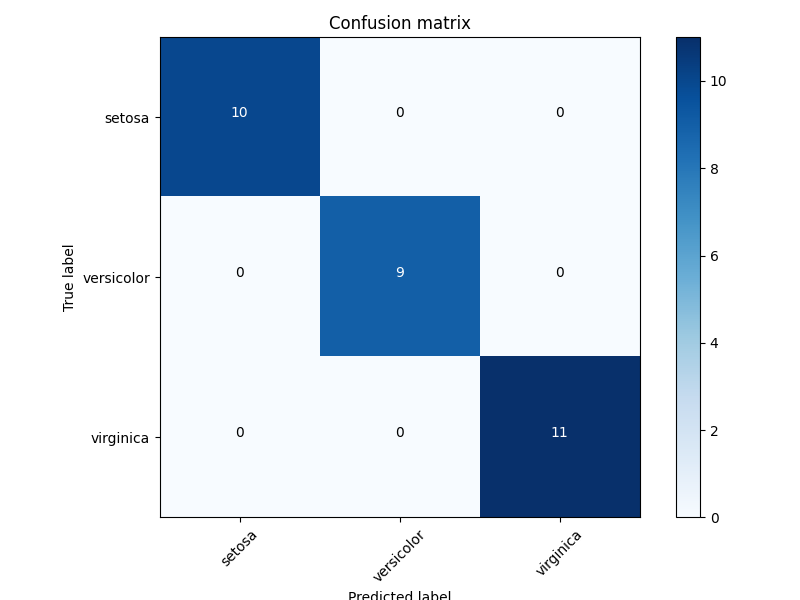

In [8]:
# Display confusion matrix
from IPython.display import Image
Image('experiments/confusion_matrix.png')